The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

## Imports needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

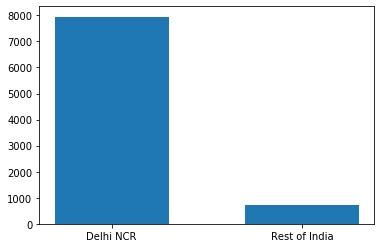

In [2]:
df = pd.read_csv('zomato.csv', encoding='latin-1')

# Extract Indian dataframe
df_India = df[df['Country Code']==1].copy(deep=True)
df_India.reset_index(drop=True,inplace=True)

# Extract Delhi-NCR dataframe
df_ncr = df_India[(df_India['City']=='Ghaziabad') | (df_India['City']=='Noida') | (df_India['City']=='Gurgaon') | (df_India['City']=='Faridabad') | (df_India['City']=='New Delhi')].copy(deep=True)
df_ncr.reset_index(drop=True,inplace=True)

len_ncr = df_ncr.count()[0] # 7947
len_rest = df_India.count()[0] - len_ncr

num_res = [len_ncr, len_rest]
res_city = ['Delhi NCR', 'Rest of India']

plt.bar(res_city, num_res, width=0.6)
plt.show()


### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [3]:
# We have Delhi NCR dataframe (df_ncr) from above question. 

# Now we get dataframe which exclude delhi NCR
df_rest = df_India[(df_India['City']!='Ghaziabad') & (df_India['City']!='Noida') & (df_India['City']!='Gurgaon') & (df_India['City']!='Faridabad') & (df_India['City']!='New Delhi')].copy(deep=True)
df_rest.reset_index(drop=True,inplace=True)

ncr_cuisines = {}
rest_cuisines = {}
def fill_ncr_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        ncr_cuisines[cuis] = ncr_cuisines.get(cuis,0) + 1

def fill_rest_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        rest_cuisines[cuis] = rest_cuisines.get(cuis,0) + 1

df_ncr['Cuisines'].apply(fill_ncr_cuisines)
df_rest['Cuisines'].apply(fill_rest_cuisines)
cuis_not_in_ncr = []
for city in rest_cuisines:
    if ncr_cuisines.get(city,0)==0:
        cuis_not_in_ncr.append(city)

print('Cuisine Present in Rest of India but not in Delhi NCR :')
for cuis in cuis_not_in_ncr:
    print(cuis)

Cuisine Present in Rest of India but not in Delhi NCR :
German
Malwani
BBQ
Cajun


#### Now we chk in Api whether above cuisines not served in NCR or it is due to incomplete dataset

In [4]:
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers={'user-key':'7012e5af5250463bb007a5c4ef01f4fd'},
                   params={'city_id':1})
py_data = res.json()
for i in py_data['cuisines']:
    ncr_cuis_from_api = i['cuisine']['cuisine_name'].strip()
    if ncr_cuis_from_api in cuis_not_in_ncr:
        print(ncr_cuis_from_api,'is servered in NCR')
        
print("-------------------------------------")
print('There is lack of data in CSV file as there are some Cuisines which are served by Delhi-NCR restaurant which according to data in CSV files are not')

BBQ is servered in NCR
Malwani is servered in NCR
-------------------------------------
There is lack of data in CSV file as there are some Cuisines which are served by Delhi-NCR restaurant which according to data in CSV files are not


### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

North Indian  -  3597 restaurants
Chinese  -  2448 restaurants
Fast Food  -  1866 restaurants
Mughlai  -  933 restaurants
Bakery  -  697 restaurants
South Indian  -  569 restaurants
Continental  -  547 restaurants
Desserts  -  542 restaurants
Street Food  -  538 restaurants
Italian  -  535 restaurants
---------------------------------
North Indian  -  349 restaurants
Chinese  -  242 restaurants
Continental  -  177 restaurants
Italian  -  147 restaurants
Cafe  -  136 restaurants
Fast Food  -  97 restaurants
South Indian  -  62 restaurants
Mughlai  -  59 restaurants
Desserts  -  55 restaurants
Mexican  -  50 restaurants


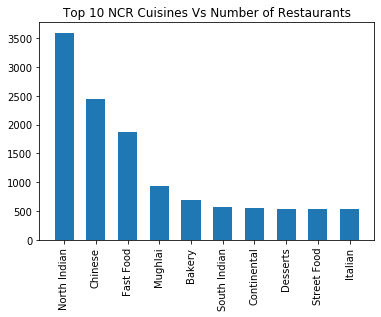

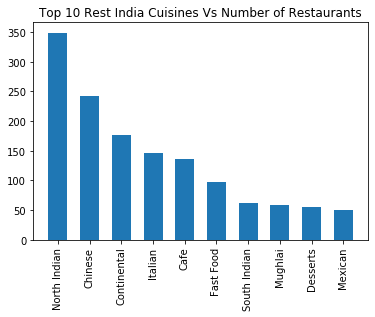

In [5]:
ncr_cuisines = {}
rest_cuisines = {}
def fill_ncr_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        ncr_cuisines[cuis] = ncr_cuisines.get(cuis,0) + 1

def fill_rest_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        rest_cuisines[cuis] = rest_cuisines.get(cuis,0) + 1

df_ncr['Cuisines'].apply(fill_ncr_cuisines)
df_rest['Cuisines'].apply(fill_rest_cuisines)

num_ncr_cuis = list(ncr_cuisines.items())
num_rest_cuis = list(rest_cuisines.items())

num_ncr_cuis.sort(key = lambda x: x[1])
num_ncr_cuis = num_ncr_cuis[::-1]

num_rest_cuis.sort(key = lambda x: x[1])
num_rest_cuis = num_rest_cuis[::-1]

rest_cuis = []
num_rest = [] # Number of restaurants which are in rest of India
ncr_cuis = []
num_ncr  =[] # Number of restaurants which are in NCR

# Print top 10 cuisines served by maximum number of restaurants in Delhi NCR
for i in range(10):
    print(num_ncr_cuis[i][0], " - ", num_ncr_cuis[i][1],'restaurants')
    ncr_cuis.append(num_ncr_cuis[i][0])
    num_ncr.append(num_ncr_cuis[i][1])
    
print("---------------------------------")

# Print top 10 cuisines served by maximum number of restaurants in rest of India
for i in range(10):
    print(num_rest_cuis[i][0], " - ", num_rest_cuis[i][1], 'restaurants')
    rest_cuis.append(num_rest_cuis[i][0])
    num_rest.append(num_rest_cuis[i][1])

# Plotting
plt.bar(ncr_cuis, num_ncr, width=0.6)
plt.xticks(rotation=90)
plt.title("Top 10 NCR Cuisines Vs Number of Restaurants")
plt.show()

plt.bar(rest_cuis, num_rest, width=0.6)
plt.xticks(rotation=90)
plt.title("Top 10 Rest India Cuisines Vs Number of Restaurants")
plt.show()


### Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

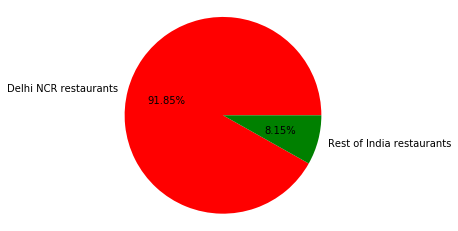

In [6]:
# Here we plot pie graph showing percentage of restaurants seving cuisines in delhi ncr vs rest of india

num_res = [len_ncr, len_rest] # len_ncr, len_rest already calculated above
res_city = ['Delhi NCR restaurants', 'Rest of India restaurants']

total = len_ncr + len_rest
plt.pie(num_res, colors=['red','green'],labels = res_city, autopct="%.2f%%")
plt.axis('equal')
plt.show()

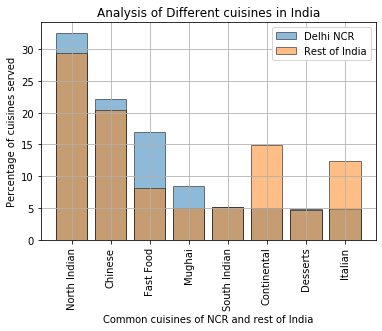

In [7]:
"""
 Now we compare cuisines which are common in top 10 cuisines served in Delhi NCR and Rest of India
     North Indian
     Chinese
     Fast Food
     Mughai
     South Indian
     Continental
     Desserts
     Italian
"""

def get_percent(total,element):
    return (element/total*100);

Del=[3597,2448,1866,933,569,547,542,535]
Rest=[349,242,97,59,62,177,55,147]
SumDel=sum(Del)
SumRest=sum(Rest)

ncr_percentage, rest_percentage = [], []
for i in range(8):
    ncr_percentage.append(get_percent(SumDel,Del[i]))
    rest_percentage.append(get_percent(SumRest,Rest[i]))

label=['North Indian','Chinese', 'Fast Food', 'Mughai', 'South Indian','Continental','Desserts', 'Italian']
plt.bar(label, ncr_percentage, edgecolor = "black", alpha = 0.5, label = 'Delhi NCR')
plt.bar(label, rest_percentage,edgecolor = "black", alpha = 0.5, label = 'Rest of India')
plt.title('Analysis of Different cuisines in India')
plt.xlabel('Common cuisines of NCR and rest of India')
plt.ylabel('Percentage of cuisines served')
plt.xticks(label, rotation = 90)
plt.grid()
plt.legend()
plt.show()
plt.show()

# Question 2.
 User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

###  Que 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant
2. Restaurant serving more number of cuisines.
3. Average Cost of Restaurant
4. Restaurant serving some specific cuisines.

### 1. Effect of number of Votes on rating 

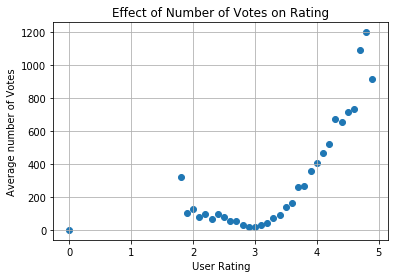

In [8]:
'''
    To show effect of votes on ratings; We plot average number of votes given to restaurant having particular rating
'''

ratings = df_India['Aggregate rating'].value_counts().index # various types of ratings given e.g 3.6, 4.2 etc.
ratings = np.array(ratings)

votes = np.array(df['Votes'])
rating_array = np.array(df['Aggregate rating'])

# store tuples of ratings and average votes given to that rating
rating_vs_votes_list = [] 

for r in ratings:
    index = np.where(rating_array==r)
    rating_vs_votes_list.append( (float(r), float(format(np.mean(votes[index]), '0.2f')) ) )
    
rating_vs_votes_list.sort() # sort on basis of ratings

ratings_list=[]
average_votes=[]
for i in rating_vs_votes_list:
    ratings_list.append(i[0])
    average_votes.append(i[1])
plt.scatter(ratings_list,average_votes)
plt.xlabel('User Rating')
plt.ylabel('Average number of Votes')
plt.title('Effect of Number of Votes on Rating')
plt.grid()
plt.show()


#### Effect of Restaurant serving more number of cuisines on Rating

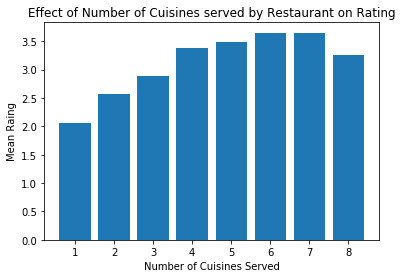

In [9]:
'''
    To show effect of number of cuisines on ratings; We plot graph between number of cuisines and average rating
    of restaurants which served that particular number of cuisines
'''

def NumberOfCuisines(l):
    return len(l);
count=0;
l=[]
for i in df_India['Cuisines']:
    l.append(NumberOfCuisines(i.split(',')))
l=np.array(l)
rating=np.array(df_India['Aggregate rating'])
unique=np.unique(l)
num_cuisines=[]
avg_ratings=[]
for i in unique:
    index=np.where(l==i)
    num_cuisines.append(i)
    avg_ratings.append(np.mean(rating[index]))
plt.bar(num_cuisines,avg_ratings)
plt.xlabel('Number of Cuisines Served')
plt.ylabel('Mean Raing')
plt.title('Effect of Number of Cuisines served by Restaurant on Rating')
plt.show()

#### Effect of Average Cost of Restaurant on Rating

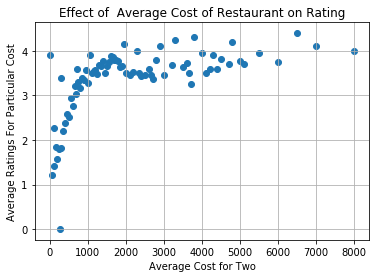

In [15]:
ratings = np.array(df_India['Aggregate rating'])
cost = np.array(df_India['Average Cost for two'])
unique_cost = np.unique(cost)

unique_cost.sort()
avg_ratings = []
user_cost = []
for c in unique_cost:
    index = np.where(cost==c)
    user_cost.append(c)
    avg_ratings.append(np.mean(ratings[index]))
    
plt.scatter(user_cost,avg_ratings)
plt.ylabel('Average Ratings For Particular Cost')
plt.xlabel('Average Cost for Two')
plt.title('Effect of  Average Cost of Restaurant on Rating')
plt.grid()
plt.show()

#### Effect of Restaurant serving some specific cuisines on Rating

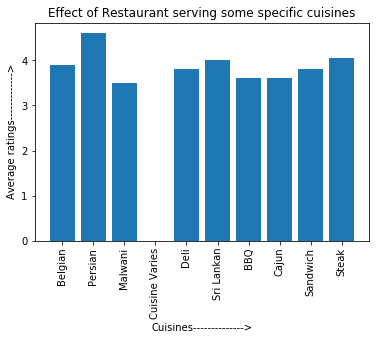

In [28]:
'''
    To find effect of specific cuisines, we first find the 10 cuisines which are least served i.e(specific cuisines)
    and then find average rating of restaurants serving that cuisines.
'''
CuisineFreq={}
cuis_rating={}
for i in df_India.index:
    cuis_list = df_India.loc[i]['Cuisines'].split(',')
    for cuis in cuis_list:
        CuisineFreq[cuis.strip()] = CuisineFreq.get(cuis.strip(),0)+1;
        cuis_rating[cuis.strip()]=cuis_rating.get(cuis.strip(),0) + df_India.loc[i]['Aggregate rating']
        
# Find 10 least served cuisines
freq_arr = list(CuisineFreq.items())
freq_arr.sort(key=lambda x:x[1])

specific_cuisines = []
specific_cuisines_ratings = []
for i in range(10):
    cuis_name = freq_arr[i][0]
    cuis_freq = freq_arr[i][1]
    specific_cuisines.append(cuis_name)
    specific_cuisines_ratings.append(cuis_rating[cuis_name]/cuis_freq)
    
plt.bar(specific_cuisines, specific_cuisines_ratings)
plt.title('Effect of Restaurant serving some specific cuisines')
plt.xlabel('Cuisines-------------->')
plt.ylabel('Average ratings------------->')
plt.xticks(rotation=90)
plt.show()


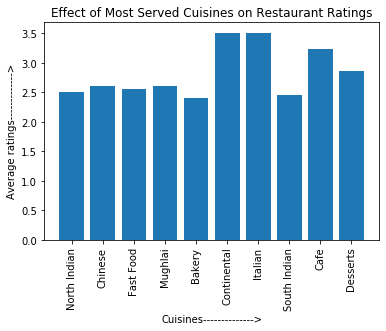

In [29]:
# Find 10 Most served cuisines

freq_arr = list(CuisineFreq.items())
freq_arr.sort(key=lambda x:x[1])
freq_arr = freq_arr[::-1]

most_served_cuisines = []
most_served_cuisines_ratings = []
for i in range(10):
    cuis_name = freq_arr[i][0]
    cuis_freq = freq_arr[i][1]
    most_served_cuisines.append(cuis_name)
    most_served_cuisines_ratings.append(cuis_rating[cuis_name]/cuis_freq)
    
plt.bar(most_served_cuisines, most_served_cuisines_ratings)
plt.title('Effect of Most Served Cuisines on Restaurant Ratings')
plt.xlabel('Cuisines-------------->')
plt.ylabel('Average ratings------------->')
plt.xticks(rotation=90)
plt.show()

### Que2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

Top 10 localities with more weighted restaurant rating...
Aminabad  -  4.9
Hotel Clarks Amer, Malviya Nagar  -  4.9
Friends Colony  -  4.89
Powai  -  4.84
Kirlampudi Layout  -  4.82
Deccan Gymkhana  -  4.8
Express Avenue Mall,  Royapettah  -  4.8
Banjara Hills  -  4.72
Sector 5, Salt Lake  -  4.71
Riverside Mall, Gomti Nagar  -  4.7


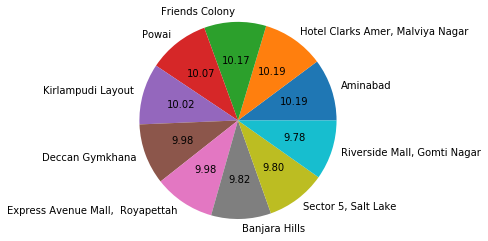

In [39]:
local = dict()
vote = dict()
for i in df_India.index:
    key = df_India['Locality'][i]
    if key in local:
        local[key] += round(df_India['Votes'][i]*df_India['Aggregate rating'][i], 2)
        vote[key] += df_India['Votes'][i]
    else:
        local[key] = round(df_India['Votes'][i]*df_India['Aggregate rating'][i], 2)
        vote[key] = df_India['Votes'][i]
for key in local:
    if local[key] == 0 or vote[key] == 0:
        continue
    local[key] = round(local[key]/vote[key], 2)
        
wr = list(local.items())
wr.sort(key = lambda x: x[1])
wr = wr[::-1]

locality,w_r = [],[]
print('Top 10 localities with more weighted restaurant rating...')
for i in range(10):
    print(wr[i][0], ' - ', wr[i][1])
    locality.append(wr[i][0])
    w_r.append(wr[i][1])

plt.pie(w_r, labels=locality, autopct='%.2f')
plt.axis("equal")
plt.show()


# 3. Visualization

### Plot the bar graph top 15 restaurants have a maximum number of outlets.

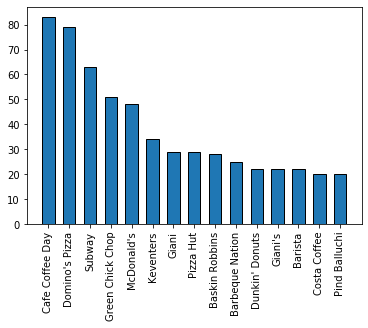

In [41]:
names = df_India['Restaurant Name'].value_counts().index[0:15]
num_outlets = df_India['Restaurant Name'].value_counts().values[0:15]

plt.bar(names, num_outlets, edgecolor='black', width=0.6)
plt.xticks(rotation=90)
plt.show()

### Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

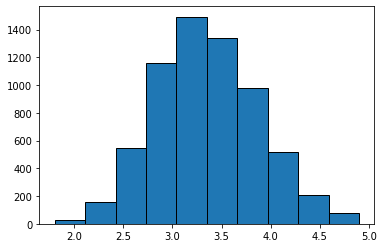

In [44]:
agg_ratings = []
def get_ratings(agg_r):
    if pd.isnull(agg_r) or agg_r==0.0:
        pass
    else:
        agg_ratings.append(agg_r)
df_India['Aggregate rating'].apply(get_ratings)

plt.hist(agg_ratings, edgecolor='black')
plt.show()

### Plot the bar graph top 10 restaurants in the data with the highest number of votes.

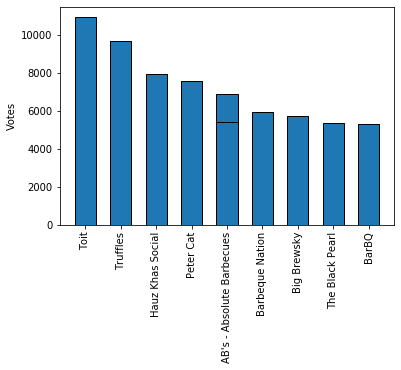

In [49]:
df_India.sort_values('Votes', ascending = False, inplace=True)

# We plot graph for top 10 most voted restaurants
names = list(df_India['Restaurant Name'][:10])
votes = list(df_India['Votes'][:10])
plt.bar(names, votes, edgecolor='black', width=0.6)
plt.xticks(rotation=90)
plt.ylabel('Votes')
plt.show()

### Plot the pie graph of top 10 cuisines present in restaurants in the USA.

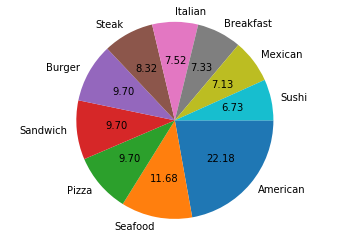

In [50]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df_USA = df[df['Country Code']==216].copy(deep=True)

cuisines_freq = {}
def get_cuis(cuisines):
    if pd.isnull(cuisines) or cuisines=='':
        pass
    else:
        cuis_lst = [cus.strip() for cus in cuisines.strip().split(',')]
        for c in cuis_lst:
            cuisines_freq[c] = cuisines_freq.get(c,0) + 1

df_USA['Cuisines'].apply(get_cuis)

c_list = list(cuisines_freq.items())
c_list.sort(key=lambda x:x[1])
c_list = c_list[::-1]

cuis_name = []
freq = []
for i in range(10):
    cuis_name.append(c_list[i][0])
    freq.append(c_list[i][1])

plt.pie(freq, labels=cuis_name, counterclock=False, autopct="%.2f")
plt.axis("equal")
plt.show()

### Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.
### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

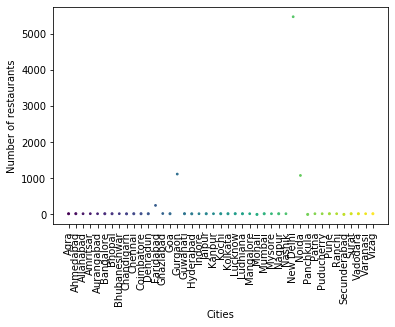

In [53]:
df_cities = df_India.groupby('City')
cities, num_restaurants, weighted_rating = [], [], []
for city, df_city in df_cities:
    cities.append(city)
    num_restaurants.append(len(df_city))
    
    temp = df_cities.get_group(city).copy(deep=True)
    temp['r'] = temp['Aggregate rating']*temp['Votes']
    w = (temp['r'].sum() / temp['Votes'].sum())

    weighted_rating.append(int(w))

colors = np.arange(len(cities))
plt.scatter(cities, num_restaurants, s=weighted_rating, c=colors)
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Number of restaurants')
plt.show()